In [200]:
import pandas as pd
from pprint import pprint
import requests
from config import ClientID,ClientSecret
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random

In [3]:
AUTH_URL = "https://accounts.spotify.com/api/token"
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': ClientID,
    'client_secret': ClientSecret,
})

#Convert response to JSON
auth_response_data = auth_response.json()

#Save the access token
access_token = auth_response_data['access_token']

#Need to pass access token into header to send properly formed GET request to API server
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [4]:
BASE_URL = 'https://api.spotify.com/v1/' 
search_BASE_URL=f"{BASE_URL}search?"

In [5]:
Charts=pd.read_csv("Resources/MusicCharts.csv")
Charts
Charts.rename(columns={"year":"Year",
                      "position":"Position",
                      "artist":"Artist",
                      "song":"Song"},inplace=True)
Charts=Charts[["Year","Position","Artist","Song"]]

In [6]:
Year2000=Charts.loc[Charts["Year"]==2000]
Year2001=Charts.loc[Charts["Year"]==2001]
Year2002=Charts.loc[Charts["Year"]==2002]
Year2003=Charts.loc[Charts["Year"]==2003]
Year2004=Charts.loc[Charts["Year"]==2004]
Year2005=Charts.loc[Charts["Year"]==2005]
Year2006=Charts.loc[Charts["Year"]==2006]
Year2007=Charts.loc[Charts["Year"]==2007]
Year2008=Charts.loc[Charts["Year"]==2008]
Year2009=Charts.loc[Charts["Year"]==2009]
Year2010=Charts.loc[Charts["Year"]==2010]
Year2011=Charts.loc[Charts["Year"]==2011]
Year2012=Charts.loc[Charts["Year"]==2012]
Year2013=Charts.loc[Charts["Year"]==2013]
Year2014=Charts.loc[Charts["Year"]==2014]
Year2015=Charts.loc[Charts["Year"]==2015]
Year2016=Charts.loc[Charts["Year"]==2016]
Year2017=Charts.loc[Charts["Year"]==2017]
Year2018=Charts.loc[Charts["Year"]==2018]
Year2019=Charts.loc[Charts["Year"]==2019]
Year2020=Charts.loc[Charts["Year"]==2020]
Year2021=Charts.loc[Charts["Year"]==2021]

In [7]:
def spotifyuri(df): 
    
    tempyear=df.iloc[0,0]
    print(f"{tempyear}")
        
    for index in df.index:

        artist1=[]
        artist1=df.loc[index,"Artist"].split(" & ")

        searchterm=f'{df.loc[index,"Song"]}'

        for art in range(len(artist1)):
            searchterm=f'{searchterm} {artist1[art]}'

        searchtype="track"
        params={"q":{searchterm},
           "type":{searchtype}}
        info=requests.get(search_BASE_URL ,params=params, headers=headers).json()

        try: 
            album=info["tracks"]["items"][0]["album"]["name"]
            df.loc[index,"Album"]=album
            uri=info["tracks"]['items'][0]['uri']
            df.loc[index,"Track URI"]=uri
            urisplit=uri.split(":")
            tempuri=urisplit[2]
            df.loc[index,"Spotify URI Code"]=tempuri

        except IndexError:

            song=df.loc[index,"Song"]
            number=df.loc[index,"Position"]
            print(f"\nFailure to locate: {song} (Position:{number})\n")
            df.loc[index,"Album"]=float("nan")
            df.loc[index,"Track URI"]=float("nan")
        
        URI=df.loc[index,"Spotify URI Code"]
        analysis=requests.get(f"https://api.spotify.com/v1/audio-features/{URI}",headers=headers).json()
        
        try:
            df.loc[index,"Acousticness"]=analysis["acousticness"]
            df.loc[index,"Danceability"]=analysis["danceability"]
            df.loc[index,"Duration"]=analysis["duration_ms"]
            df.loc[index,"Energy"]=analysis["energy"]
            df.loc[index,"Instrumentalness"]=analysis["instrumentalness"]
            df.loc[index,"Liveness"]=analysis['liveness']
            df.loc[index,"Loudness"]=analysis['loudness']
            df.loc[index,"Speechiness"]=analysis['speechiness']
            df.loc[index,"Tempo"]=analysis['tempo']
            df.loc[index,"Valence"]=analysis['valence']
            
        except KeyError:
            df.loc[index,"Acousticness"]=float("nan")
            df.loc[index,"Danceability"]=float("nan")
            df.loc[index,"Duration"]=float("nan")
            df.loc[index,"Energy"]=float("nan")
            df.loc[index,"Instrumentalness"]=float("nan")
            df.loc[index,"Liveness"]=float("nan")
            df.loc[index,"Loudness"]=float("nan")
            df.loc[index,"Speechiness"]=float("nan")
            df.loc[index,"Tempo"]=float("nan")
            df.loc[index,"Valence"]=float("nan")

        
    df.dropna(how="any",inplace=True)
    
    return df

In [8]:
searchtype="track"
params={"q":"Ed Sheerean",
       "type":{searchtype}}
info=requests.get(search_BASE_URL ,params=params, headers=headers).json()
pprint(info)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Ed+Sheerean&type=track&offset=0&limit=20',
            'items': [{'album': {'album_type': 'single',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4nDoRrQiYLoBzwC5BhVJzF'},
                                              'href': 'https://api.spotify.com/v1/artists/4nDoRrQiYLoBzwC5BhVJzF',
                                              'id': '4nDoRrQiYLoBzwC5BhVJzF',
                                              'name': 'Camila Cabello',
                                              'type': 'artist',
                                              'uri': 'spotify:artist:4nDoRrQiYLoBzwC5BhVJzF'},
                                             {'external_urls': {'spotify': 'https://open.spotify.com/artist/6eUKZXaKkcviH0Ku9w2n3V'},
                                              'href': 'https://api.spotify.com/v1/artists/6eUKZXaKkcviH0Ku9w2n3V',
                                

                       'external_ids': {'isrc': 'GBAHS1600463'},
                       'external_urls': {'spotify': 'https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3'},
                       'href': 'https://api.spotify.com/v1/tracks/7qiZfU4dY1lWllzX7mPBI3',
                       'id': '7qiZfU4dY1lWllzX7mPBI3',
                       'is_local': False,
                       'name': 'Shape of You',
                       'popularity': 85,
                       'preview_url': 'https://p.scdn.co/mp3-preview/09e92af512355474ccf074988ea208ce6eb90a2b?cid=1bdba88ec3c9477d8b61636109a26244',
                       'track_number': 4,
                       'type': 'track',
                       'uri': 'spotify:track:7qiZfU4dY1lWllzX7mPBI3'},
                      {'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7dGJo4pcD2V6oG8kP0tJRR'},
                                              'href': 'ht

                       'external_urls': {'spotify': 'https://open.spotify.com/track/1bhUWB0zJMIKr9yVPrkEuI'},
                       'href': 'https://api.spotify.com/v1/tracks/1bhUWB0zJMIKr9yVPrkEuI',
                       'id': '1bhUWB0zJMIKr9yVPrkEuI',
                       'is_local': False,
                       'name': 'Perfect Duet (Ed Sheeran & Beyoncé)',
                       'popularity': 80,
                       'preview_url': 'https://p.scdn.co/mp3-preview/9e1d78058053cc1e4dfc2c6b35040a5bc364f0a6?cid=1bdba88ec3c9477d8b61636109a26244',
                       'track_number': 1,
                       'type': 'track',
                       'uri': 'spotify:track:1bhUWB0zJMIKr9yVPrkEuI'},
                      {'album': {'album_type': 'album',
                                 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4WN5naL3ofxrVBgFpguzKo'},
                                              'href': 'https://api.spotify.com/v1/artists/4WN5naL3o

                                                       'TD',
                                                       'TG',
                                                       'TH',
                                                       'TJ',
                                                       'TL',
                                                       'TN',
                                                       'TO',
                                                       'TR',
                                                       'TT',
                                                       'TV',
                                                       'TW',
                                                       'TZ',
                                                       'UA',
                                                       'UG',
                                                       'US',
                                                       'UY',
                        

In [9]:
Year2000=spotifyuri(Year2000)
Year2001=spotifyuri(Year2001)
Year2002=spotifyuri(Year2002)
Year2003=spotifyuri(Year2003)
Year2004=spotifyuri(Year2004)
Year2005=spotifyuri(Year2005)
Year2006=spotifyuri(Year2006)
Year2007=spotifyuri(Year2007)
Year2008=spotifyuri(Year2008)
Year2009=spotifyuri(Year2009)
Year2010=spotifyuri(Year2010)
Year2011=spotifyuri(Year2011)
Year2012=spotifyuri(Year2012)
Year2013=spotifyuri(Year2013)
Year2014=spotifyuri(Year2014)
Year2015=spotifyuri(Year2015)
Year2016=spotifyuri(Year2016)
Year2017=spotifyuri(Year2017)
Year2018=spotifyuri(Year2018)
Year2019=spotifyuri(Year2019)
Year2020=spotifyuri(Year2020)
Year2021=spotifyuri(Year2021)

2000


/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)



Failure to locate: I Wanna Know (Position:3)


Failure to locate: Hot Boyz (Position:56)


Failure to locate: Forgot About Dre (Position:64)



/Users/jovansandhu/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


2001

Failure to locate: Lady Marmalade (Voulez-Vous Coucher Aver Moi Ce Soir?) (Position:10)


Failure to locate: Stutter (Position:19)

2002

Failure to locate: Move B***h (Position:65)

2003

Failure to locate: Stand Up (Position:40)


Failure to locate: Can't Hold Us Down (Position:41)

2004

Failure to locate: Dip It Low (Position:15)


Failure to locate: Stand Up (Position:99)

2005

Failure to locate: 1-2 Step (Position:8)


Failure to locate: Lose Control (Position:19)


Failure to locate: Going Crazy (Position:92)

2006

Failure to locate: I'm In Love with A Stripper (Position:62)


Failure to locate: So What (Position:69)


Failure to locate: Show Stoppers (Position:83)

2007

Failure to locate: Let It Go (Position:68)


Failure to locate: Ein Stern (... der deinen Namen tragt) (Position:89)

2008
2009
2010

Failure to locate: What Do You Want From Me? (Position:36)


Failure to locate: Getting Over You (Position:39)

2011

Failure to locate: 6 Foot 7 Foot (Position:100)

201

In [275]:
Year=[Year2000,Year2001,Year2002,Year2003,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,
      Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,Year2017,Year2018,Year2019,Year2020,Year2021]
AllYears=pd.concat(Year)

,Year,Position,Artist,Song,Album,Track URI,Spotify URI Code,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,2000,1,Faith Hill,Breathe,Breathe,spotify:track:3y4LxiYMgDl4RethdzpmNe,3y4LxiYMgDl4RethdzpmNe,0.17300,0.529,250547.0,0.496,0.000000,0.2510,-9.007,0.0290,136.859,0.278
1,2000,2,Santana & The Product G,Maria Maria,Supernatural (Remastered),spotify:track:3XKIUb7HzIF1Vu9usunMzc,3XKIUb7HzIF1Vu9usunMzc,0.04060,0.777,261973.0,0.601,0.002010,0.0348,-5.931,0.1260,97.911,0.680
3,2000,4,Aaliyah,Try Again,Aaliyah,spotify:track:6Wnlq1Pu3I0BajLvxn05Vr,6Wnlq1Pu3I0BajLvxn05Vr,0.07890,0.794,284640.0,0.662,0.000000,0.0937,-4.913,0.2490,93.053,0.683
4,2000,5,Toni Braxton,He Wasn't Man Enough,The Heat,spotify:track:7f1Dmr246cJ9uQYdbplTbh,7f1Dmr246cJ9uQYdbplTbh,0.00916,0.739,261933.0,0.947,0.000031,0.3260,-1.916,0.0411,88.009,0.766
5,2000,6,Rob Thomas & Santana,Smooth,Supernatural (Remastered),spotify:track:0n2SEXB2qoRQg171q7XqeW,0n2SEXB2qoRQg171q7XqeW,0.16000,0.609,294987.0,0.923,0.000005,0.2950,-3.908,0.0338,115.996,0.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2021,96,Brett Young,Lady,Weekends Look A Little Different These Days,spotify:track:2fSuoIlA1uTERXunbshSWh,2fSuoIlA1uTERXunbshSWh,0.44900,0.403,194293.0,0.516,0.000013,0.0937,-7.983,0.0343,170.015,0.428
2196,2021,97,Florida Georgia Line,Long Live,Life Rolls On,spotify:track:0YfRAYTNTNszGg8VARrSIH,0YfRAYTNTNszGg8VARrSIH,0.17800,0.611,153253.0,0.846,0.000000,0.1200,-3.548,0.0374,129.961,0.544
2197,2021,98,Robin Schulz & Kiddo,All We Got,All We Got (feat. KIDDO),spotify:track:1FP9s72rDYty6mfoOEYKnE,1FP9s72rDYty6mfoOEYKnE,0.28600,0.504,190218.0,0.760,0.000000,0.1510,-4.246,0.0426,183.933,0.640
2198,2021,99,Imagine Dragons,Follow You,Follow You / Cutthroat,spotify:track:7FdUvDkaE24o3FPIWTvzv2,7FdUvDkaE24o3FPIWTvzv2,0.00209,0.542,175644.0,0.732,0.000079,0.4960,-5.956,0.0521,124.912,0.489


In [11]:
Mean=AllYears.groupby(["Year"]).mean()[["Acousticness","Danceability","Duration","Energy","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Valence"]]
Mean

,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Year,,,,,,,,,,
2000,0.123435,0.681928,242683.350515,0.747206,0.008970,0.146972,-5.965619,0.072770,117.642856,0.629312
2001,0.144382,0.666673,248720.408163,0.684367,0.030406,0.163820,-6.168990,0.107062,116.036388,0.588667
2002,0.141898,0.668374,246983.969697,0.725111,0.024081,0.162459,-5.757616,0.108503,117.825727,0.613366
2003,0.183242,0.666980,246208.214286,0.691633,0.026918,0.164055,-6.050133,0.131835,117.796153,0.602931
2004,0.168188,0.666602,244951.775510,0.690276,0.024930,0.167024,-5.902153,0.122333,117.136367,0.587228
2005,0.109626,0.687396,237224.343750,0.679760,0.020802,0.171779,-5.947604,0.124625,111.748844,0.563812
2006,0.111412,0.676433,239633.412371,0.697536,0.009367,0.188475,-5.751577,0.132531,118.781887,0.562595
2007,0.137601,0.660082,241403.306122,0.725122,0.010174,0.172478,-5.495122,0.109370,122.476765,0.566561
2008,0.123736,0.659600,230617.470000,0.723710,0.019754,0.174953,-5.518570,0.073401,126.608110,0.539547


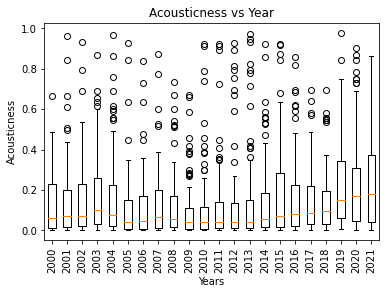

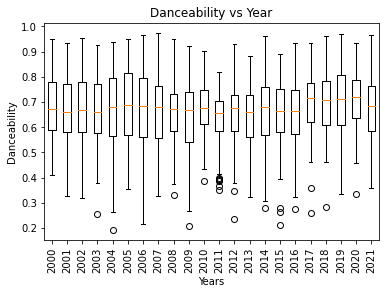

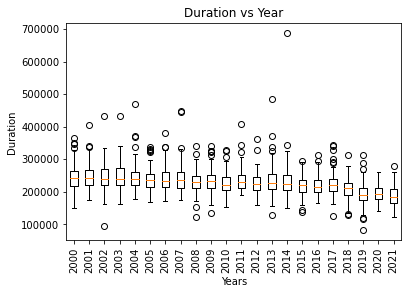

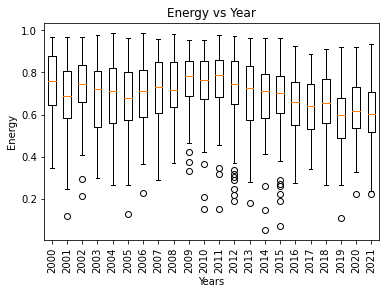

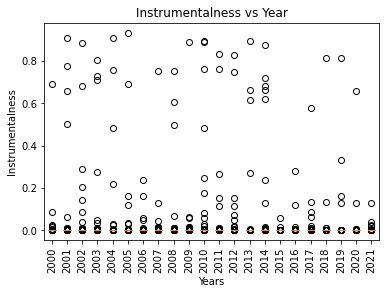

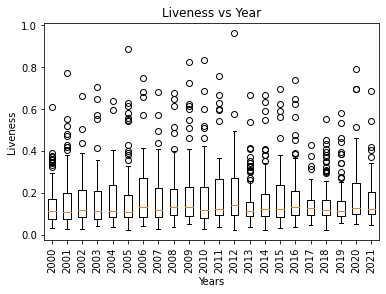

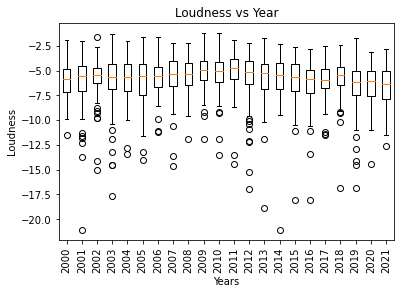

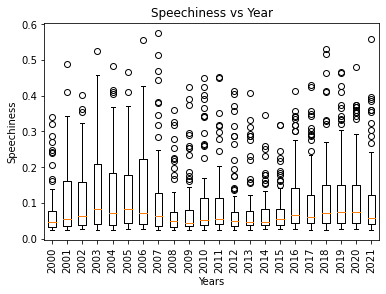

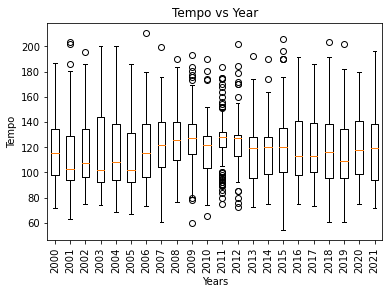

In [395]:
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    
    AcousticnessBoxplot=pd.DataFrame({"2000":Year2000.reset_index()[Audio],
                                    "2001":Year2001.reset_index()[Audio],
                                    "2002":Year2002.reset_index()[Audio],
                                    "2003":Year2003.reset_index()[Audio],
                                    "2004":Year2004.reset_index()[Audio],
                                    "2005":Year2005.reset_index()[Audio],
                                    "2006":Year2006.reset_index()[Audio],
                                    "2007":Year2007.reset_index()[Audio],
                                    "2008":Year2008.reset_index()[Audio],
                                    "2009":Year2009.reset_index()[Audio],
                                    "2010":Year2010.reset_index()[Audio],
                                    "2011":Year2011.reset_index()[Audio],
                                    "2012":Year2012.reset_index()[Audio],
                                    "2013":Year2013.reset_index()[Audio],
                                    "2014":Year2014.reset_index()[Audio],
                                    "2015":Year2015.reset_index()[Audio],
                                    "2016":Year2016.reset_index()[Audio],
                                    "2017":Year2017.reset_index()[Audio],
                                    "2018":Year2018.reset_index()[Audio],
                                    "2019":Year2019.reset_index()[Audio],
                                    "2020":Year2020.reset_index()[Audio],
                                    "2021":Year2021.reset_index()[Audio]})
    AcousticnessBoxplot.dropna(how="any",inplace=True)
    fig, ax = plt.subplots()
    ax.boxplot(AcousticnessBoxplot,labels=list(range(2000,2022)),meanline=True)
#     Mean[Audio].plot()
    ax.set_title(f"{Audio} vs Year")
    ax.set_xlabel("Years")
    ax.set_ylabel(f"{Audio}")
    plt.xticks(rotation="vertical")
    plt.show()
    plt.savefig(f'Figures/YearbyYearBoxplots/{Audio}Boxplots.png')
    plt.close()

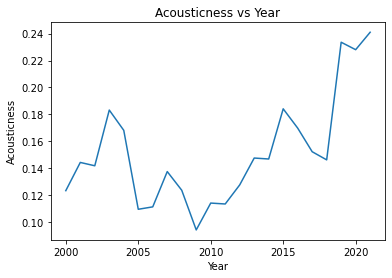

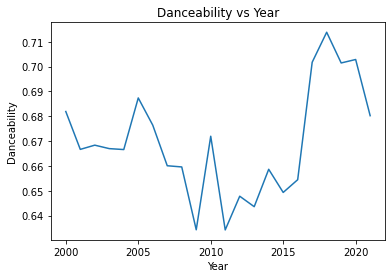

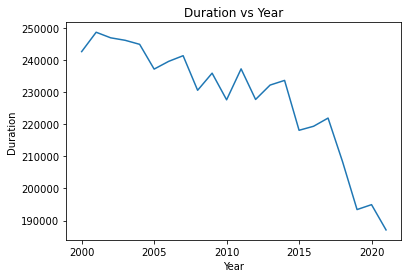

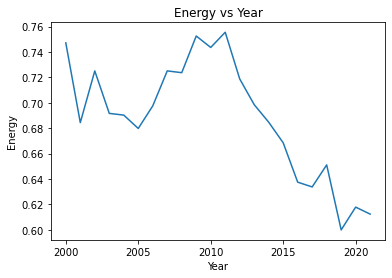

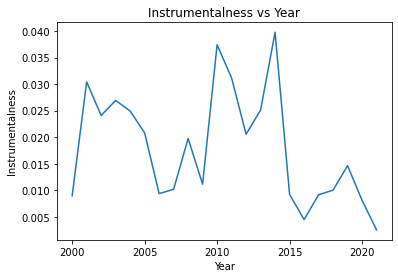

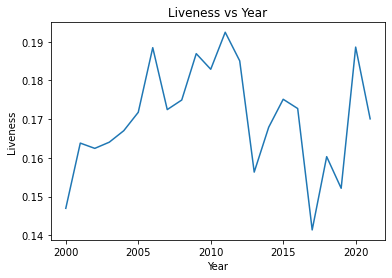

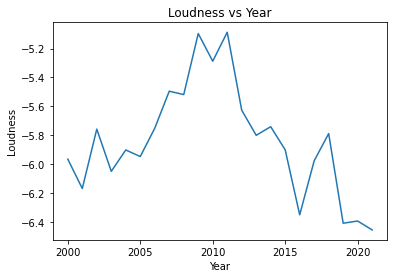

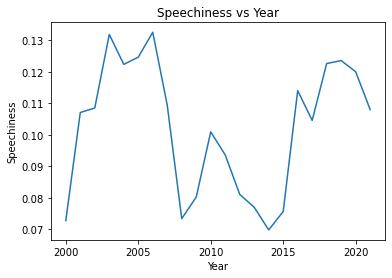

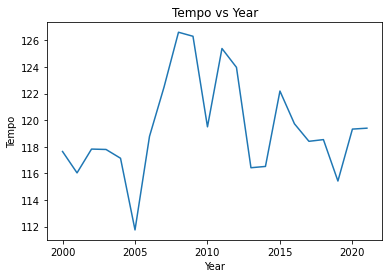

In [402]:
AudioColumns=AllYears.columns[7:16]

for Audio in AudioColumns:
    Mean[Audio].T.plot()
    plt.title(f"{Audio} vs Year")
    plt.xlabel("Year")
    plt.ylabel(f"{Audio}")
    plt.savefig(f'Figures/YearbyYearPlots/{Audio}Plots.png')
    plt.show()
    plt.close()

9


<ErrorbarContainer object of 3 artists>

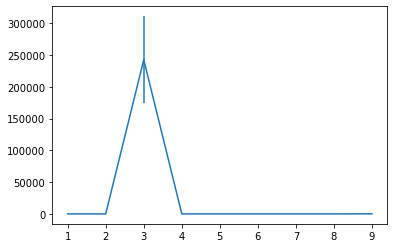

In [451]:
AudioColumns=AllYears.columns[7:16]
NeededColumns=AllYears.columns
AllYearsAudio=AllYears[AudioColumns]
errorplot=[]
medianplot=[]
for Audio in AudioColumns:
    [MIN,lower,median,upper,MAX]=Year2000[Audio].quantile([0,0.25,0.5,0.75,1])
    medianplot.append(median)
    IQR=upper-lower
    error=1.5*IQR
    errorplot.append(error)
print(len(medianplot))
plt.errorbar([1,2,3,4,5,6,7,8,9],medianplot,errorplot)

In [428]:
AllYearsAudio

,Year,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,2000,0.17300,0.529,250547.0,0.496,0.000000,0.2510,-9.007,0.0290,136.859,0.278
1,2000,0.04060,0.777,261973.0,0.601,0.002010,0.0348,-5.931,0.1260,97.911,0.680
3,2000,0.07890,0.794,284640.0,0.662,0.000000,0.0937,-4.913,0.2490,93.053,0.683
4,2000,0.00916,0.739,261933.0,0.947,0.000031,0.3260,-1.916,0.0411,88.009,0.766
5,2000,0.16000,0.609,294987.0,0.923,0.000005,0.2950,-3.908,0.0338,115.996,0.961
...,...,...,...,...,...,...,...,...,...,...,...
2195,2021,0.44900,0.403,194293.0,0.516,0.000013,0.0937,-7.983,0.0343,170.015,0.428
2196,2021,0.17800,0.611,153253.0,0.846,0.000000,0.1200,-3.548,0.0374,129.961,0.544
2197,2021,0.28600,0.504,190218.0,0.760,0.000000,0.1510,-4.246,0.0426,183.933,0.640
2198,2021,0.00209,0.542,175644.0,0.732,0.000079,0.4960,-5.956,0.0521,124.912,0.489


In [ ]:
#Next Analysis
#Acousticness
#Duration
#Energy
#???????Loudness
#Valence